# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import bernoulli
from scipy.stats import binom
import math

## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [2]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here
p = 1 - 0.4 

q = 1 - 0.6
#paolo: ok but why not p=0.6 and q=0.4 directly?

Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [3]:
# your code here
"""The appropriate distribution is a Bernoulli distribution"""

five_apples = (p)**5

print('first five fruits are apples probability is {:0.3f}'.format(five_apples))

five_apple_fifteen_oranges = ((p)**5)  * ((q)**15)
print('first five fruits are apples and the next 15 are organges probability is {:0.3f}'.format(five_apple_fifteen_oranges))

first five fruits are apples probability is 0.078
first five fruits are apples and the next 15 are organges probability is 0.000


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [10]:
# your code here
p_not_ordered =  ((20*19*18*17*16) / (5*4*3*2*1)) * five_apple_fifteen_oranges
print('Samples contains five apples and fifteen oranges in random order {:0.3f}'.format(p_not_ordered))

Samples contains five apples and fifteen oranges in random order 0.001


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [11]:
# your code here

'''
CDF = Sum of probabilities up to 4 fruits are apple.
'''

k = 4       # We can all the probabilities where we have less than five apples 
p = 0.6     # success rate of picking an apple
n = 20      # Number of fruits that are taken 


print('Samples contains less than five apples: {:0.3f}'.format(binom.cdf(n=20,k=4,p=0.6) * 100) )

Samples contains less than five apples: 0.032


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

In [6]:
# your code here
# Please label the axes and give a title to the plot    

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (21).

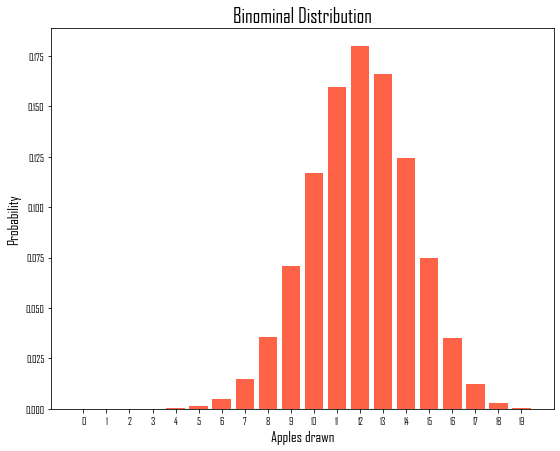

In [18]:
lst = np.arange(0,20)
n = 20        
p = 0.6   
plt.rcParams["font.family"] = "agency fb" #Snatched this font type from Gorkem :)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 7)

x = [binom.pmf(k,n,p) for k in range(n)]

ax.bar(lst, x,color="tomato",label="Probabilities")
ax.set_xlabel("Apples drawn",size=15)
ax.set_ylabel("Probability",size=15)
ax.set_title("Binominal Distribution",size=20)
ax.set_xticks(np.arange(20))
#paolo: ok but this cell gives error, should be np.arange(21)
ax.set_xticklabels([i for i in range(n+1)])
plt.legend(loc="upper left",prop={"size":20})
plt.grid(True)
plt.show()
#paolo: yes

In [17]:
## If I did this correct the outcome of the previous questions should equal the 

lst = [binom.pmf(k,n,p) for k in range(1,5)]

round(sum(lst)*100,4) == round(binom.cdf(n=20,k=4,p=0.6) * 100,4)

True

## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [19]:
# your code here 
import math
%matplotlib inline 
from scipy import stats
from scipy.stats import poisson

lambda_possoin = 2.3
poisson = stats.poisson(lambda_possoin)

poisson.pmf(5)

0.053775025581946814

**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

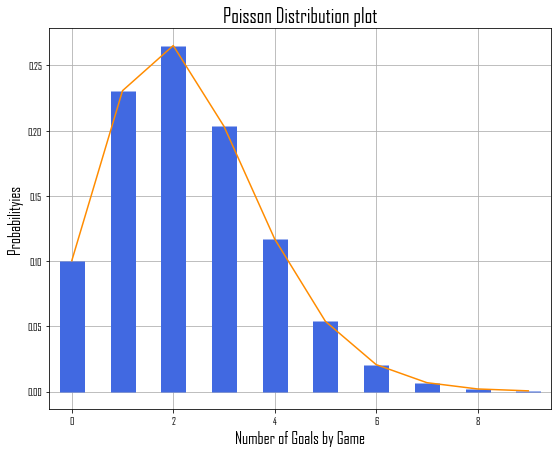

In [20]:
# your code here
# Please label the axes and give a title to the plot 

x = np.arange(0,10)
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(9, 7)
ax.plot(x, poisson.pmf(x),color='darkorange')
#Plot axis vertical lines
ax.vlines(x, 0, poisson.pmf(x), colors='royalblue', lw=25, alpha=1)
ax.set_title('Poisson Distribution plot',size=20)
ax.set_xlabel('Number of Goals by Game',size=16)
ax.set_ylabel('Probabilityies',size=16)
plt.grid(True)
plt.show()

In [21]:
#paolo check yes- good work!